# Evaluation and comparison of models

In [1]:
import tensorflow as tf
from tensorflow import keras

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2023-08-17 13:51:31.225574: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-17 13:51:31.257557: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-17 13:51:31.844573: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Num GPUs Available:  1


2023-08-17 13:51:33.372365: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-17 13:51:33.391534: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-17 13:51:33.391721: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [2]:
image_size = (180, 180)
batch_size = 16 # My GPU could only handle this BS

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Using 4682 files for validation.


2023-08-17 13:51:33.800028: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-17 13:51:33.800198: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-17 13:51:33.800263: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

## Visualize the data

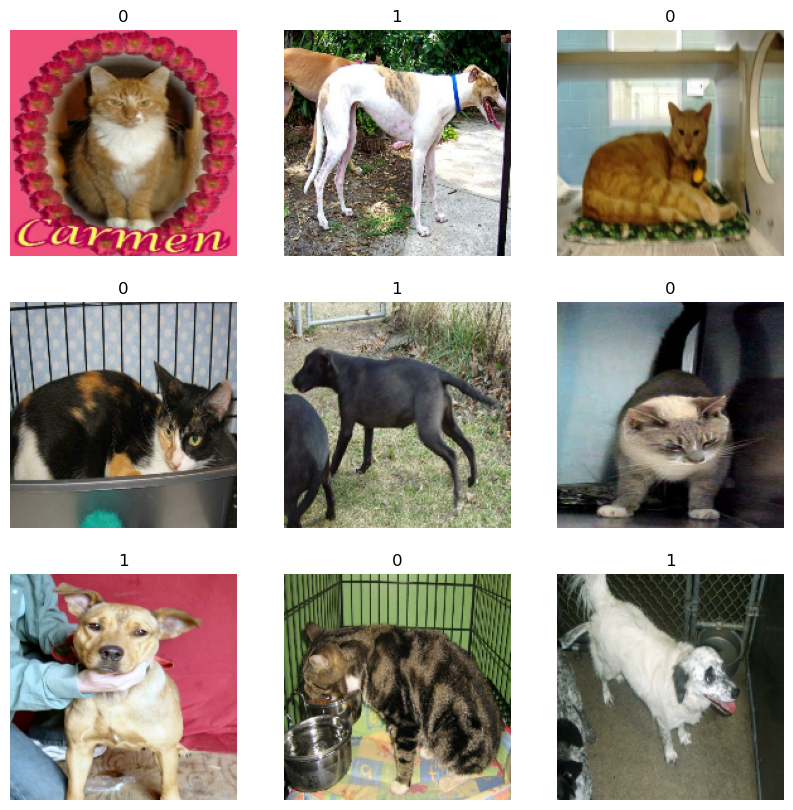

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

# Baseline

In [4]:
model = keras.models.load_model(f"./models_from_server/model_cats_dogs/model/save_at_100.keras")

model.compile(
    # optimizer=keras.optimizers.Adam(learning_rate),
    # loss="binary_crossentropy", 
    metrics=["accuracy"],
)

In [6]:
model.evaluate(val_ds)

 19/293 [>.............................] - ETA: 11s - loss: 0.0000e+00 - accuracy: 0.9704

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


 31/293 [==>...........................] - ETA: 10s - loss: 0.0000e+00 - accuracy: 0.9637

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


103/293 [=========>....................] - ETA: 8s - loss: 0.0000e+00 - accuracy: 0.9624

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


133/293 [============>.................] - ETA: 6s - loss: 0.0000e+00 - accuracy: 0.9610

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


211/293 [====================>.........] - ETA: 3s - loss: 0.0000e+00 - accuracy: 0.9582

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


225/293 [======================>.......] - ETA: 2s - loss: 0.0000e+00 - accuracy: 0.9589

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


293/293 [==============================] - 13s 43ms/step - loss: 0.0000e+00 - accuracy: 0.9579


[0.0, 0.957923948764801]